## Importar bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Ler datasets train e test

In [2]:
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')

### Transformação - definir o Id do passageiro como index

In [3]:
#train.set_index('PassengerId', inplace=True)
#test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [4]:
train.shape, test.shape

((891, 12), (418, 11))

## Trandução das colunas

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test.columns = ['PassengerId','Classe', 'Nome', 'Sexo', 'Idade', \
                'IrmaosConjuge', 'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [8]:
train.columns = ['PassengerId','Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade',\
                 'IrmaosConjuge', 'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [51]:
train = pd.DataFrame(train, columns=['PassengerId','Nome','Sexo','Idade','IrmaosConjuge','PaisFilhos',\
                                     'Bilhete','Tarifa', 'Cabine', 'Embarque', 'Classe', 'Sobreviveu'])
#----------------------------------------------------------------------------------------------------------
test = pd.DataFrame(test, columns=['PassengerId','Nome', 'Sexo', 'Idade', 'IrmaosConjuge',\
                                   'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque', 'Classe'])

## Dicionário de Dados
    
    Idade: idades dos passageiros
    Cabine: número da cabine
    Embarque: porto de Embarque - C = Cherbourg, Q = Queenstown, S = Southampton
    Tarifa: tarifa da passagem
    Nome: nome dos passageiros
    Sobreviveu: 0 = No, 1 = Yes
    Classe: identificação da classe - 1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe
    Sexo: sexo dos passageiros
    Irmãos conjuge: irmãos abordos no Titanic
    Pais e filhos: pais e filhos abordos no Titanic
    Bilhete: número do bilhete

In [10]:
train.head()

,PassengerId,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque,Classe,Sobreviveu
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


### Mapear sexo para "homem" e "mulher"

In [11]:
sexo = {'male': 'homem', 'female': 'mulher'}
train['Sexo'] = train['Sexo'].map(sexo)

In [12]:
sexo = {'male': 'homem', 'female': 'mulher'}
test['Sexo'] = test['Sexo'].map(sexo)

# Tipos de dados

## Parâmetros categóricos

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Nome           891 non-null    object 
 2   Sexo           891 non-null    object 
 3   Idade          714 non-null    float64
 4   IrmaosConjuge  891 non-null    int64  
 5   PaisFilhos     891 non-null    int64  
 6   Bilhete        891 non-null    object 
 7   Tarifa         891 non-null    float64
 8   Cabine         204 non-null    object 
 9   Embarque       889 non-null    object 
 10  Classe         891 non-null    int64  
 11  Sobreviveu     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Nominais

Embarque,
Sexo,
Sobreviveu

### Ordinais

Classe

## Parâmetros Numéricos

### Contínuos

Idade, 
Tarifa

### Discretos

IrmaosConjuge, 
PaisFilhos

## Parâmetros Alfanuméricos

Bilhete

## Dados incompletos

In [14]:
train.isnull().sum()

PassengerId        0
Nome               0
Sexo               0
Idade            177
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Cabine           687
Embarque           2
Classe             0
Sobreviveu         0
dtype: int64

In [15]:
test.isnull().sum()

PassengerId        0
Nome               0
Sexo               0
Idade             86
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Cabine           327
Embarque           0
Classe             0
dtype: int64

### Tratamento da variável Embarque

In [16]:
moda_embarque = train['Embarque'].mode()[0]
train['Embarque'].fillna(moda_embarque, inplace=True)

In [17]:
moda_embarque = test['Embarque'].mode()[0]
test['Embarque'].fillna(moda_embarque, inplace=True)

In [18]:
train.describe()

,PassengerId,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Classe,Sobreviveu
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208,2.308642,0.383838
std,257.353842,14.526497,1.102743,0.806057,49.693429,0.836071,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400,2.000000,0.000000
50%,446.000000,28.000000,0.000000,0.000000,14.454200,3.000000,0.000000
75%,668.500000,38.000000,1.000000,0.000000,31.000000,3.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


## Agrupamentos

### Agrupamento de Classe com Sobreviveu 

Passageiros de primeira classe são muito mais propensos a sobreviver do que de segunda e terceira classe
Passageiros de segunda classe são menos propensos a sobreviver do que de primeira classe, mas são mais 
propensos a sobreviver do que de terceira classe

In [19]:
train[['Classe', 'Sobreviveu']].groupby(['Classe'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


### Agrupar Sexo x Sobrevivência

74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra

In [20]:
train[['Sexo', 'Sobreviveu']].groupby(['Sexo'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


## Visualização de Dados

### Gráfico de barras e pizza de Sobreviventes

Text(0, 0.5, '')

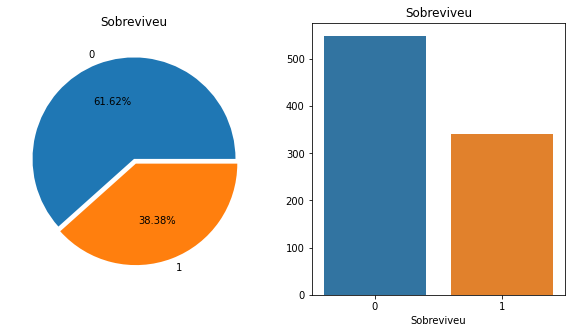

In [21]:
f, ax=plt.subplots(1,2,figsize=(10,5))
train['Sobreviveu'].value_counts().plot.pie(explode=[0,0.05], autopct='%0.2f%%', ax=ax[0])
ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')
sns.countplot('Sobreviveu', data=train, ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')

### Gráfico de barras e sobreviventes por sexo

<AxesSubplot:xlabel='Sexo', ylabel='count'>

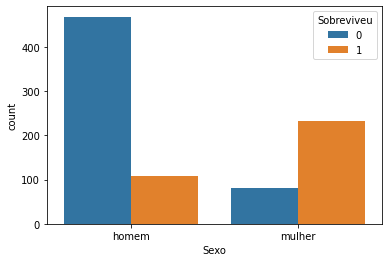

In [22]:
sns.countplot('Sexo', hue='Sobreviveu', data=train)

### Histograma da idade x sobrevivência

- Crianças sobreviveram mais
- Passageiro mais idoso sobreviveu
- A maioria dos passageiros estão na faixa de 18-35 anos (E a maioria não sobreviveu)

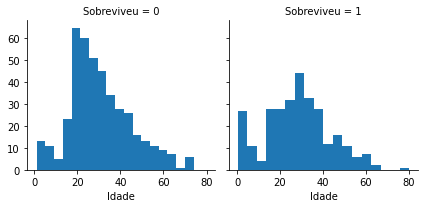

In [23]:
g = sns.FacetGrid(train, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

### Histograma de Idade x Classe x Sobreviveu

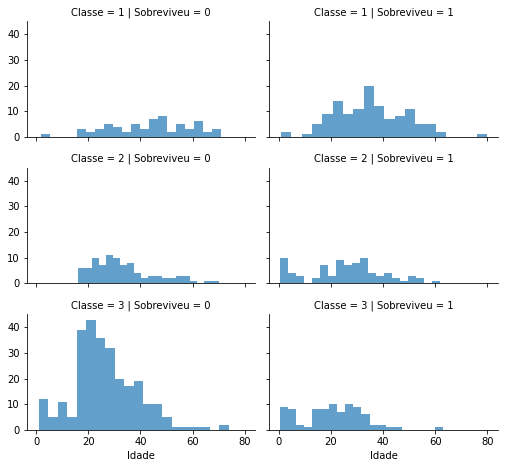

In [24]:
grid = sns.FacetGrid(train, col='Sobreviveu', row='Classe', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Idade', alpha=0.7, bins=20)
grid.add_legend()

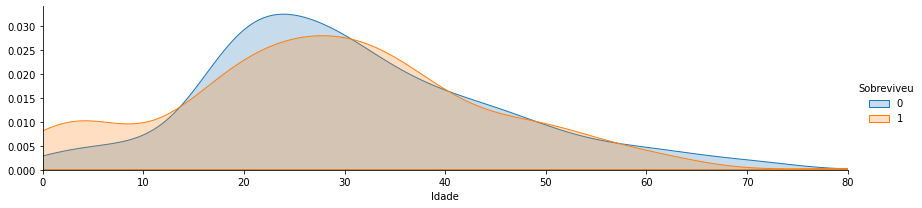

In [25]:
facet = sns.FacetGrid(train, hue='Sobreviveu',aspect=4)
facet.map(sns.kdeplot,'Idade',shade= True)
facet.set(xlim=(0, train['Idade'].max()))
facet.add_legend()
 
plt.show()

### Chances de sobrevivência por ponto de embarque

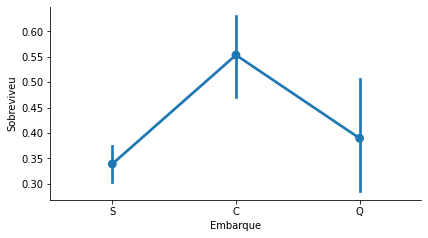

In [26]:
sns.catplot('Embarque', 'Sobreviveu', data=train, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

### Embarque x Classe x Sobreviveu

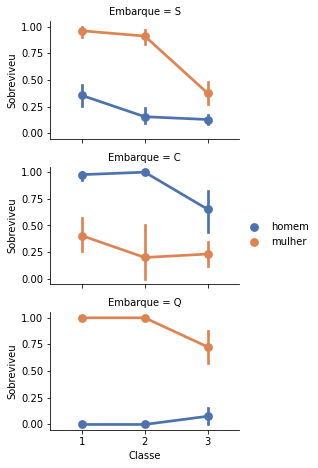

In [27]:
grid = sns.FacetGrid(train, row='Embarque', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo', palette='deep')
grid.add_legend()

### Visualizando Dados Faltando

<AxesSubplot:>

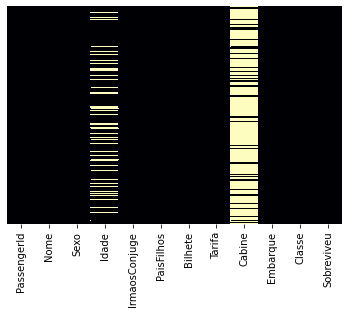

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Tratamento das variáveis

In [29]:
train.drop('Nome', axis=1, inplace=True)
test.drop('Nome', axis=1, inplace=True)

In [30]:
train.columns

Index(['PassengerId', 'Sexo', 'Idade', 'IrmaosConjuge', 'PaisFilhos',
       'Bilhete', 'Tarifa', 'Cabine', 'Embarque', 'Classe', 'Sobreviveu'],
      dtype='object')

In [31]:
sexo_mapping = {'homem': 0, 'mulher': 1}

train['Sexo'] = train['Sexo'].map(sexo_mapping)
test['Sexo'] = test['Sexo'].map(sexo_mapping)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Sexo           891 non-null    int64  
 2   Idade          714 non-null    float64
 3   IrmaosConjuge  891 non-null    int64  
 4   PaisFilhos     891 non-null    int64  
 5   Bilhete        891 non-null    object 
 6   Tarifa         891 non-null    float64
 7   Cabine         204 non-null    object 
 8   Embarque       891 non-null    object 
 9   Classe         891 non-null    int64  
 10  Sobreviveu     891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [33]:
train['Idade'].fillna(train.groupby('Idade')['Idade'].transform('median'), inplace=True)
test['Idade'].fillna(test.groupby('Idade')['Idade'].transform('median'), inplace=True)

In [34]:
train

,PassengerId,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque,Classe,Sobreviveu
0,1,0,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,1,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,1,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,35.0,0,0,373450,8.0500,NaN,S,3,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,211536,13.0000,NaN,S,2,0
887,888,1,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,890,0,26.0,0,0,111369,30.0000,C148,C,1,1


In [35]:
test

,PassengerId,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque,Classe
0,892,0,34.5,0,0,330911,7.8292,NaN,Q,3
1,893,1,47.0,1,0,363272,7.0000,NaN,S,3
2,894,0,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,0,27.0,0,0,315154,8.6625,NaN,S,3
4,896,1,22.0,1,1,3101298,12.2875,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,NaN,0,0,A.5. 3236,8.0500,NaN,S,3
414,1306,1,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,3
416,1308,0,NaN,0,0,359309,8.0500,NaN,S,3


### Tratamento de Embarque

<AxesSubplot:>

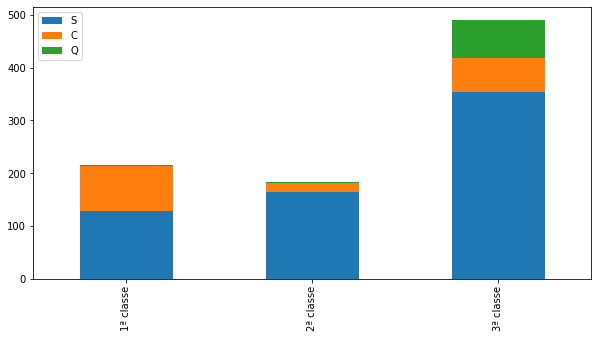

In [36]:
#Conjunto de treinamento

Classe1 = train[train['Classe']==1]['Embarque'].value_counts()
Classe2 = train[train['Classe']==2]['Embarque'].value_counts()
Classe3 = train[train['Classe']==3]['Embarque'].value_counts()
df = pd.DataFrame([Classe1, Classe2, Classe3])
df.index = ['1ª classe','2ª classe', '3ª classe']
df.plot(kind='bar',stacked=True, figsize=(10,5))

<AxesSubplot:>

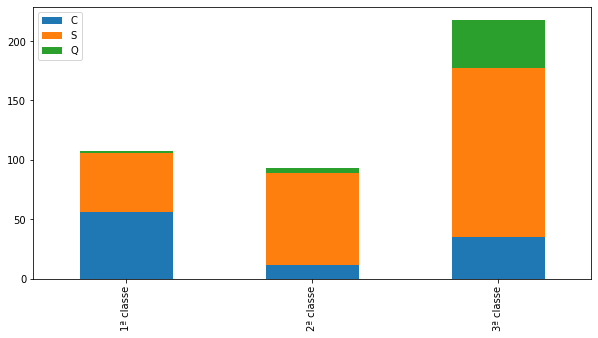

In [37]:
#Conjunto de teste

Classe1 = test[test['Classe']==1]['Embarque'].value_counts()
Classe2 = test[test['Classe']==2]['Embarque'].value_counts()
Classe3 = test[test['Classe']==3]['Embarque'].value_counts()
df = pd.DataFrame([Classe1, Classe2, Classe3])
df.index = ['1ª classe','2ª classe', '3ª classe']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [38]:
train['Embarque'] = train['Embarque'].fillna('S')
test['Embarque'] = test['Embarque'].fillna('S')

In [39]:
embarque_mapping = {'S': 0, 'C': 1, 'Q': 2}

train['Embarque'] = train['Embarque'].map(embarque_mapping)
test['Embarque'] = test['Embarque'].map(embarque_mapping)

### Tramento de Tarifa

In [40]:
train['Tarifa'].fillna(train.groupby('Classe')['Tarifa'].transform('median'), inplace=True)
test['Tarifa'].fillna(test.groupby('Classe')['Tarifa'].transform('median'), inplace=True)

### Tratamento de Cabine

In [41]:
train.Cabine.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
F33            3
              ..
D11            1
T              1
C148           1
A26            1
E34            1
Name: Cabine, Length: 147, dtype: int64

In [42]:
train['Cabine'] = train['Cabine'].str[:1]
test['Cabine'] = test['Cabine'].str[:1]

<AxesSubplot:>

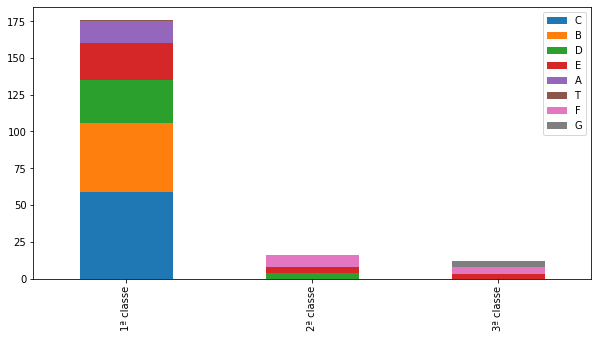

In [43]:
#Conjunto de treinamento

Classe1 = train[train['Classe']==1]['Cabine'].value_counts()
Classe2 = train[train['Classe']==2]['Cabine'].value_counts()
Classe3 = train[train['Classe']==3]['Cabine'].value_counts()
df = pd.DataFrame([Classe1, Classe2, Classe3])
df.index = ['1ª classe','2ª classe', '3ª classe']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [44]:
cabine_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

train['Cabine'] = train['Cabine'].map(cabine_mapping)
test['Cabine'] = test['Cabine'].map(cabine_mapping)

In [45]:
#completar os faltantes com mediana
train['Cabine'].fillna(train.groupby('Classe')['Cabine'].transform('median'), inplace=True)
test['Cabine'].fillna(test.groupby('Classe')['Cabine'].transform('median'), inplace=True)

### Remover variáveis desnecessárias

In [46]:
features_drop = ['PassengerId', 'Bilhete', 'IrmaosConjuge', 'PaisFilhos']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [47]:
#train = train.drop(['PassengerId'], axis=1)

In [48]:
train_data = train.drop('Sobreviveu', axis=1)
target = train['Sobreviveu']

train_data.shape, target.shape

((891, 6), (891,))

In [49]:
train_data.head(10)

,Sexo,Idade,Tarifa,Cabine,Embarque,Classe
0,0,22.0,7.2500,2.0,0,3
1,1,38.0,71.2833,0.8,1,1
2,1,26.0,7.9250,2.0,0,3
3,1,35.0,53.1000,0.8,0,1
4,0,35.0,8.0500,2.0,0,3
5,0,NaN,8.4583,2.0,2,3
6,0,54.0,51.8625,1.6,0,1
7,0,2.0,21.0750,2.0,0,3
8,1,27.0,11.1333,2.0,0,3
9,1,14.0,30.0708,1.8,1,2


## Aplicação de Machine Learning